## Parsing and Manipulating Dates and Times with lubridate
Dates and times come in a huge assortment of formats, so your first hurdle is often to parse the format you have into an R datetime. This chapter teaches you to import dates and times with the lubridate package. You'll also learn how to extract parts of a datetime. You'll practice by exploring the weather in R's birthplace, Auckland NZ.

### Selecting the right parsing function
lubridate provides a set of functions for parsing dates of a known order. For example, ymd() will parse dates with year first,
followed by month and then day. The parsing is flexible, for example, it will parse the m whether it is numeric (e.g. 9 or 09),
a full month name (e.g. September), or an abbreviated month name (e.g. Sep).
All the functions with y, m and d in any order exist. If your dates have times as well, you can use the functions that start 
with ymd, dmy, mdy or ydm and are followed by any of _h, _hm or _hms.
To see all the functions available look at ymd() for dates and ymd_hms() for datetimes.
Here are some challenges. In each case we've provided a date, your job is to choose the correct function to parse it.
For each date the ISO 8601 format is displayed as a comment after it, to help you check your work

In [3]:
library(lubridate)

# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

### Specifying an order with 'parse_date_time()'
What about if you have something in a really weird order like dym_msh? There's no named function just for that order, 
but that is where parse_date_time() comes in. parse_date_time() takes an additional argument, orders, where you can specify 
the order of the components in the date.
For example, to parse "2010 September 20th" you could say parse_date_time("2010 September 20th", orders = "ymd") and 
that would be equivalent to using the ymd() function from the previous exercise.
One advantage of parse_date_time() is that you can use more format characters. For example, you can specify weekday names 
with A, I for 12 hour time, am/pm indicators with p and many others. You can see a whole list on the help page ?parse_date_time.
Another big advantage is that you can specify a vector of orders, and that allows parsing of dates where multiple 
formats might be used.

In [4]:
# x is a trickier datetime. Use the clues in the instructions to parse x.
# Specify an order string to parse x
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "AmdyIp")

# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("mdy","dmy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("dOmY", "OmY","Y"))

# notice that when a date component is missing, it's just set to 1. For example, the input 1253 resulted in the date 1253-01-01

[1] "2010-06-01 16:00:00 UTC"

[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

### Import daily weather data
In practice you won't be parsing isolated dates and times, they'll be part of a larger dataset. Throughout the chapter after you've mastered a skill with a simpler example (the release times of R for example), you'll practice your lubridate skills in context by working with weather data from Auckland NZ.

There are two data sets: akl_weather_daily.csv a set of once daily summaries for 10 years, and akl_weather_hourly_2016.csv observations every half hour for 2016. You'll import the daily data in this exercise and the hourly weather in the next exercise.

You'll be using functions from dplyr, so if you are feeling rusty, you might want to review filter(), select() and mutate().

           date max_temp min_temp mean_temp mean_rh                 events
1      9/1/2007       60       51        56      75                   <NA>
2      9/2/2007       60       53        56      82                   Rain
3      9/3/2007       57       51        54      78                   <NA>
4      9/4/2007       64       50        57      80                   Rain
5      9/5/2007       53       48        50      90                   Rain
6      9/6/2007       57       42        50      69                   <NA>
7      9/7/2007       59       41        50      77                   <NA>
8      9/8/2007       59       46        52      80                   <NA>
9      9/9/2007       55       50        52      88                   Rain
10    9/10/2007       59       50        54      82                   Rain
11    9/11/2007       57       50        54      78                   <NA>
12    9/12/2007       59       42        50      78                   <NA>
13    9/13/2007       62 

 Factor w/ 3659 levels "1/1/2008","1/1/2009",..: 3354 3465 3576 3597 3608 3619 3630 3640 3650 3365 ...
 Date[1:3661], format: "2007-09-01" "2007-09-02" "2007-09-03" "2007-09-04" "2007-09-05" ...


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

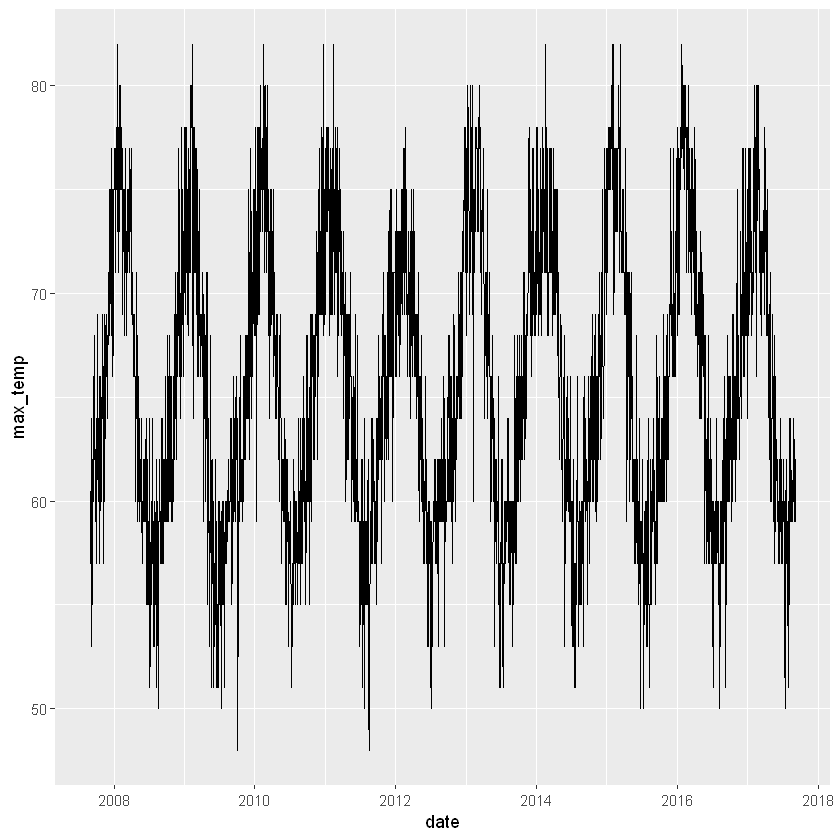

In [9]:
# use dplyr to pipe data 
library(dplyr)
library(ggplot2)

# Use read.csv() to import Auckland daily weather.csv
akl_daily_raw <- read.csv('Auckland daily weather.csv')

# Print akl_daily_raw to confirm the date column hasn't been interpreted as a date.
print(akl_daily_raw)
str(akl_daily_raw$date)

# Using mutate() overwrite the column date with a parsed version of date. 
akl_daily <- akl_daily_raw %>%
  mutate(date = mdy(date))

# Print akl_daily to verify the date column is now a Date.
str(akl_daily$date)

# Take a look at the data by plotting date on the x-axis and max_temp of the y-axis.
# Plot to check work
ggplot(akl_daily, aes(x = date, y = max_temp)) +
  geom_line() 

### Import hourly weather data
The hourly data is a little different. The date information is spread over three columns year, month and mday, 
so you'll need to use make_date() to combine them.
Then the time information is in a separate column again, time. It's quite common to find date and 
time split across different variables. One way to construct the datetimes is to paste the date and time together 
and then parse them. You'll do that in this exercise.

  year month mday    time temperature weather conditions events humidity
1 2016     1    1 0:00:00          68   Clear      Clear   <NA>       68
2 2016     1    1 0:30:00          68   Clear      Clear   <NA>       68
3 2016     1    1 1:00:00          68   Clear      Clear   <NA>       73
4 2016     1    1 1:30:00          68   Clear      Clear   <NA>       68
5 2016     1    1 2:00:00          68   Clear      Clear   <NA>       68
6 2016     1    1 2:30:00          68   Clear      Clear   <NA>       68
              date_utc
1 2015-12-31T11:00:00Z
2 2015-12-31T11:30:00Z
3 2015-12-31T12:00:00Z
4 2015-12-31T12:30:00Z
5 2015-12-31T13:00:00Z
6 2015-12-31T13:30:00Z
 int [1:17454] 2016 2016 2016 2016 2016 2016 2016 2016 2016 2016 ...
 int [1:17454] 1 1 1 1 1 1 1 1 1 1 ...
 int [1:17454] 1 1 1 1 1 1 1 1 1 1 ...
  year month mday    time temperature weather conditions events humidity
1 2016     1    1 0:00:00          68   Clear      Clear   <NA>       68
2 2016     1    1 0:30:00          

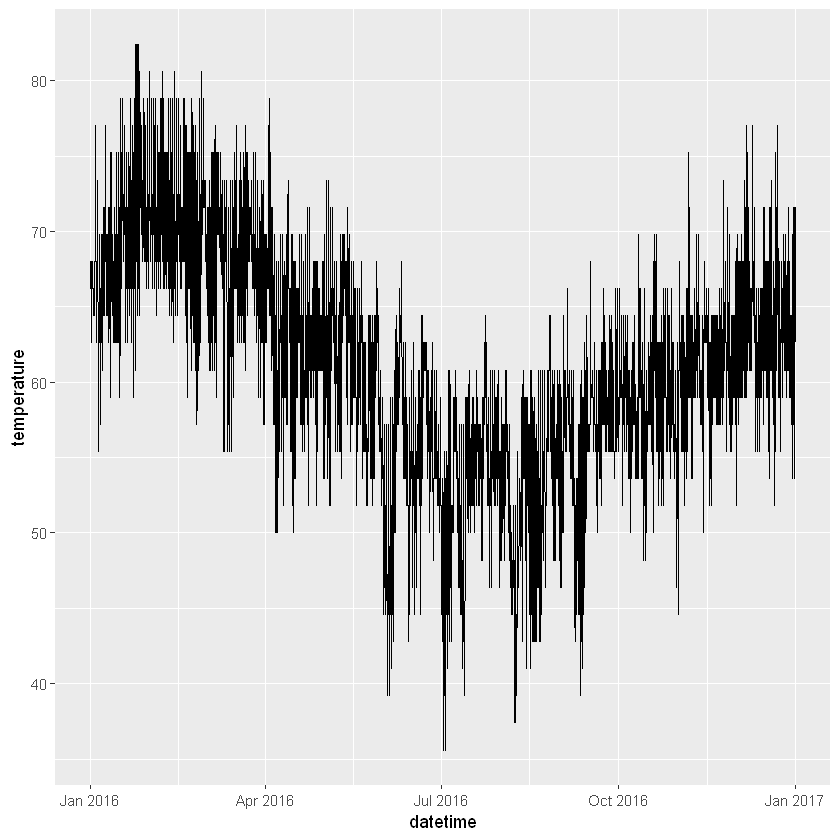

In [19]:
# Use read.csv() to import Auckland daily weather.csv
akl_hourly_raw <- read.csv('Auckland hourly weather.csv')

# Print akl_hourly_raw
print(head(akl_hourly_raw))
# check tyoe of columns
str(akl_hourly_raw$year)
str(akl_hourly_raw$month)
str(akl_hourly_raw$mday)

# Use make_date() and mutate() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))
# check 
print(head(akl_hourly))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )
# check  to verify they match up.
print(head(akl_hourly))

# Also, you can print date, time and datetime columns of akl_hourly to verify they match up.
# akl_hourly %>% select(date, time, datetime)

# Plot to check work
ggplot(akl_hourly, aes(x = datetime, y = temperature)) + geom_line()



### What can you extract?
As you saw in the video, components of a datetime can be extracted by lubridate functions with the same name like year(), 
month(), day(), hour(), minute() and second(). They all work the same way just pass in a datetime or vector of datetimes.
There are also a few useful functions that return other aspects of a datetime like if it occurs in the morning am(), 
during daylight savings dst(), in a leap_year(), or which quarter() or semester() it occurs in.
Try them out by exploring the release times of R versions using the data from Chapter 1.

In [33]:
# import anytime
library(anytime)

# Use read.csv() to import Rreleases.csv
releases <- read.csv('Rreleases.csv')
releases
# create  a datetime
releases_mod <- releases  %>% 
  mutate(
    time_string = paste(as.Date(anytime(date)), time, sep = " "),
    datetime = ymd_hms(time_string))

print(head(releases_mod))

release_time = releases_mod$datetime

# Examine the head() of release_time
head(release_time)

# Examine the head() of the months of release_time
head(month(release_time))

# Extract the month of releases 
month(release_time) %>% table()

# Extract the year of releases
year(release_time) %>% table()

# How often is the hour before 12 (noon)?
mean(hour(release_time) < 12)

# How often is the release in am?
mean(am(release_time))

major,minor,patch,date,datetime,time,type,time.1
0,60,NA,12/4/1997,1997-12-04T08:47:58Z,12:47:58 AM,patch,NA
0,61,NA,12/21/1997,1997-12-21T13:09:22Z,12:09:22 AM,minor,NA
0,61,1,1/10/1998,1998-01-10T00:31:55Z,12:31:55 AM,patch,NA
0,61,2,3/14/1998,1998-03-14T19:25:55Z,12:25:55 AM,patch,NA
0,61,3,5/2/1998,1998-05-02T07:58:17Z,12:58:17 AM,patch,NA
0,62,NA,6/14/1998,1998-06-14T12:56:20Z,12:56:20 AM,minor,NA
0,62,1,6/14/1998,1998-06-14T22:13:25Z,12:13:25 AM,patch,NA
0,62,2,7/10/1998,1998-07-10T11:13:45Z,12:13:45 AM,patch,NA
0,62,3,8/28/1998,1998-08-28T09:02:19Z,12:02:19 AM,patch,NA
0,62,4,10/23/1998,1998-10-23T12:08:41Z,12:08:41 AM,patch,NA


  major minor patch       date            datetime        time  type time.1
1     0    60    NA  12/4/1997 1997-12-03 00:47:58 12:47:58 AM patch     NA
2     0    61    NA 12/21/1997 1997-12-20 00:09:22 12:09:22 AM minor     NA
3     0    61     1  1/10/1998 1998-01-09 00:31:55 12:31:55 AM patch     NA
4     0    61     2  3/14/1998 1998-03-13 00:25:55 12:25:55 AM patch     NA
5     0    61     3   5/2/1998 1998-05-01 00:58:17 12:58:17 AM patch     NA
6     0    62    NA  6/14/1998 1998-06-13 00:56:20 12:56:20 AM minor     NA
             time_string
1 1997-12-03 12:47:58 AM
2 1997-12-20 12:09:22 AM
3 1998-01-09 12:31:55 AM
4 1998-03-13 12:25:55 AM
5 1998-05-01 12:58:17 AM
6 1998-06-13 12:56:20 AM


[1] "1997-12-03 00:47:58 UTC" "1997-12-20 00:09:22 UTC"
[3] "1998-01-09 00:31:55 UTC" "1998-03-13 00:25:55 UTC"
[5] "1998-05-01 00:58:17 UTC" "1998-06-13 00:56:20 UTC"

[1] 12 12  1  3  5  6

.
 1  2  3  4  5  6  7  8  9 10 11 12 
 5  7  7 18  6 15  4  7  3 15  5 13 

.
1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   2   10    9    6    6    5    5    4    4    4    4    6    5    4    6    4 
2013 2014 2015 2016 2017 
   4    4    5    5    3 

[1] 1

[1] 1

### Adding useful labels
In the previous exercise you found the month of releases: head(month(release_time))
and received numeric months in return. Sometimes it's nicer (especially for plotting or tables) to have named months. 
Both the month() and wday() (day of the week) functions have additional arguments label and abbr to achieve just that. 
Set label = TRUE to have the output labelled with month (or weekday) names, and abbr = FALSE for those names 
to be written in full rather than abbreviated.

.
 1  2  3  4  5  6  7 
 3 29  9 12 18 31  3 

.
Sun Mon Tue Wed Thu Fri Sat 
  3  29   9  12  18  31   3 

major,minor,patch,date,datetime,time,type,time.1,wday
0,60,NA,12/4/1997,1997-12-04T08:47:58Z,12:47:58 AM,patch,NA,Thu
0,61,NA,12/21/1997,1997-12-21T13:09:22Z,12:09:22 AM,minor,NA,Sun
0,61,1,1/10/1998,1998-01-10T00:31:55Z,12:31:55 AM,patch,NA,Sat
0,61,2,3/14/1998,1998-03-14T19:25:55Z,12:25:55 AM,patch,NA,Sat
0,61,3,5/2/1998,1998-05-02T07:58:17Z,12:58:17 AM,patch,NA,Sat
0,62,NA,6/14/1998,1998-06-14T12:56:20Z,12:56:20 AM,minor,NA,Sun


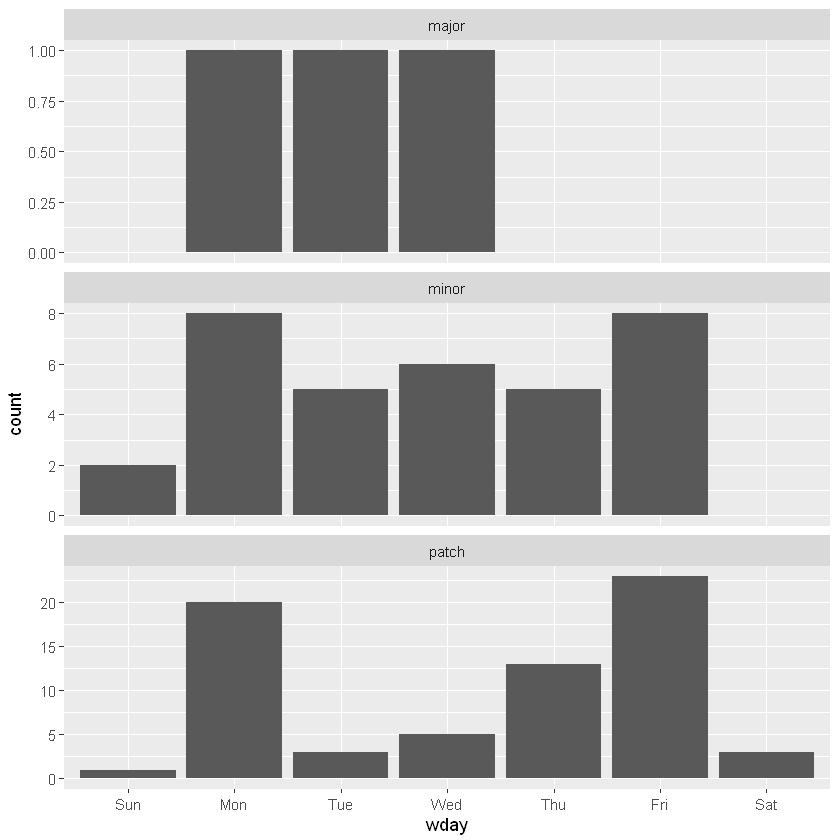

In [36]:
# For example, try running: head(month(release_time, label = TRUE, abbr = FALSE))
# Practice by examining the popular days of the week for R releases.

# Use wday() to tabulate release by day of the week
wday(releases$datetime) %>% table()

# Add label = TRUE to make table more readable
wday(releases$datetime, label = TRUE) %>% table()

# Create column wday to hold labelled week days
releases$wday <- wday(releases$datetime, label = TRUE)
# chek
head(releases)

# Create a barchart of releases by weekday, facetted by the type of release.
# Plot barchart of weekday by type of release
ggplot(releases, aes(wday)) +
  geom_bar() +
  facet_wrap(~ type, ncol = 1, scale = "free_y")

### Extracting for plotting
Extracting components from a datetime is particularly useful when exploring data. 
Earlier in the chapter you imported daily data for weather in Auckland, and created a time series plot 
of ten years of daily maximum temperature. While that plot gives you a good overview of the whole ten years, 
it's hard to see the annual pattern.
In this exercise you'll use components of the dates to help explore the pattern of maximum temperature over the year. 
The first step is to create some new columns to hold the extracted pieces, then you'll use them in a couple of plots.

Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

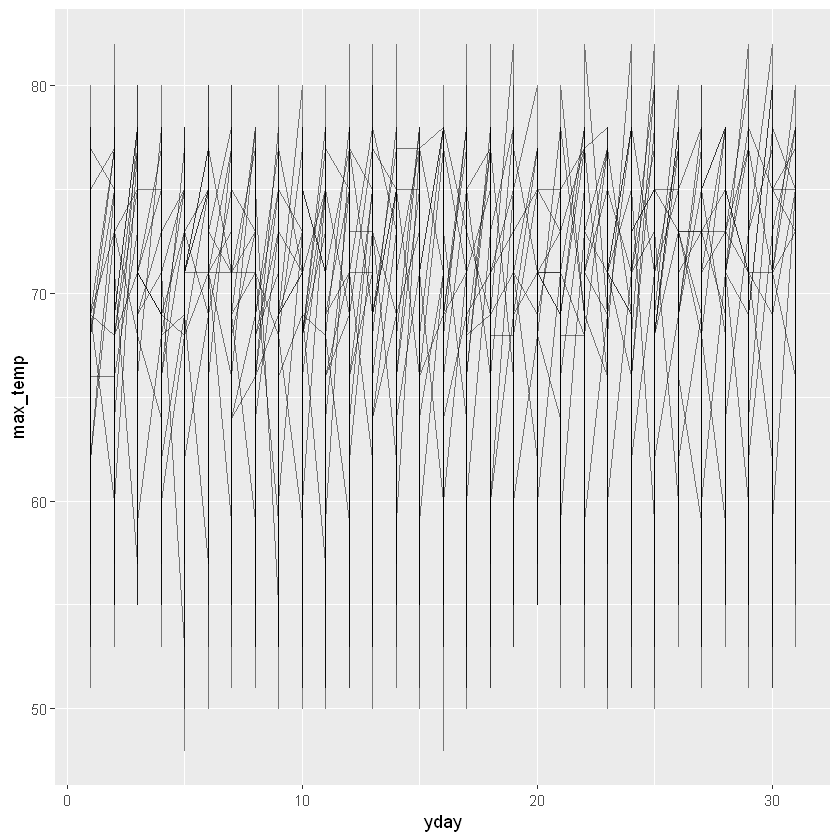

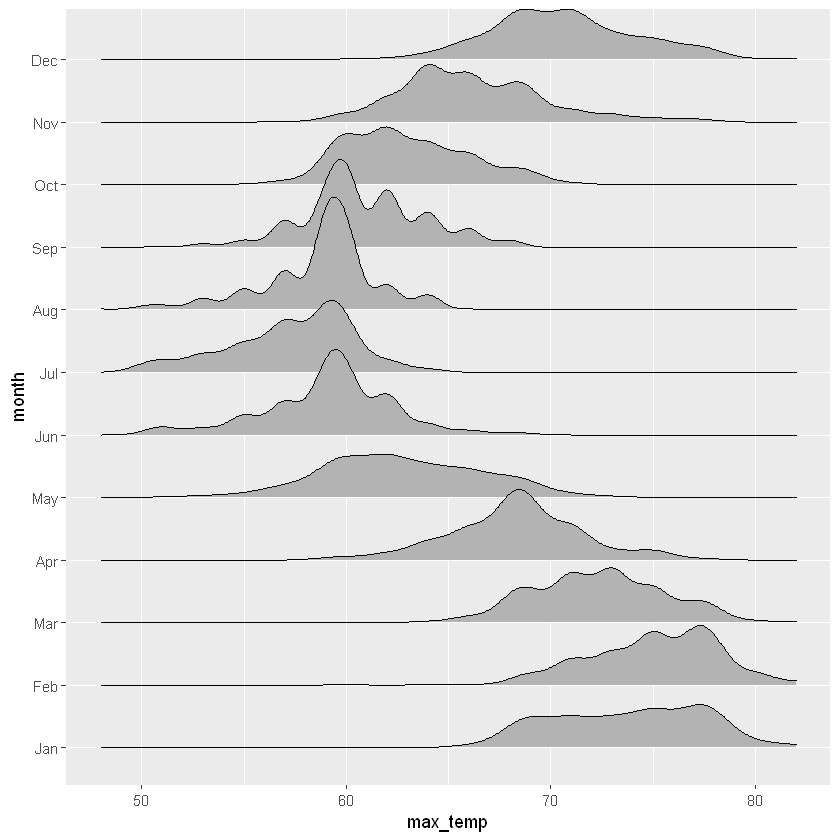

In [45]:



# Use mutate() to create three new columns: year, yday and month that respectively hold the same components of the date column.
# Don't forget to label the months with their names.
# Add columns for year, yday and month
akl_daily <- akl_daily %>%
  mutate(
    year = year(date),
    yday = day(date),
    month = month(date, label = TRUE))

# check
# print(head(akl_daily))

# Plot max_temp by yday for all years
ggplot(akl_daily, aes(x = yday, y = max_temp)) +
  geom_line(aes(group = year), alpha = 0.5)

#To take an alternate look, create a ridgeline plot(formerly known as a joyplot) with max_temp on the x-axis, 
# month on the y-axis, using geom_density_ridges() from the ggridges package.

# Examine distribution of max_temp by month
# install.packages('ggridges')
library(ggridges)
ggplot(akl_daily, aes(x = max_temp, y = month, height = ..density..)) +
  geom_density_ridges(stat = "density")

### Extracting for filtering and summarizing
Another reason to extract components is to help with filtering observations or creating summaries. 
For example, if you are only interested in observations made on weekdays (i.e. not on weekends) you could 
extract the weekdays then filter out weekends, e.g. wday(date) %in% 2:6.
In the last exercise you saw that January, February and March were great times to visit Auckland for warm 
temperatures, but will you need a raincoat?
In this exercise you'll find out! You'll use the hourly data to calculate how many days in each month there 
was any rain during the day.

In [48]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, label = TRUE),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour >= 8, hour <= 22)  # common mistake here filter(hour, hour >= 8 & hour <= 22) 

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days %>% 
  summarise(
    days_rainy = sum(any_rain)
  )

`summarise()` regrouping output by 'month' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


month,days_rainy
Jan,15
Feb,13
Mar,12
Apr,15
May,21
Jun,19
Jul,22
Aug,16
Sep,25
Oct,20


### Practice rounding
As you saw in the video 'chapter 2.4', round_date() rounds a date to the nearest value, floor_date() rounds down, 
and ceiling_date() rounds up.
All three take a unit argument which specifies the resolution of rounding. 
You can specify "second", "minute", "hour", "day", "week", "month", "bimonth", "quarter", "halfyear", or "year". 
Or, you can specify any multiple of those units, e.g. "5 years", "3 minutes" etc.

In [49]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = 'day')

# Round to nearest 5 minutes
round_date(r_3_4_1, unit = '5 minutes')

# Round up to week 
ceiling_date(r_3_4_1, unit = 'week')

# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = 'day')

[1] "2016-05-03 UTC"

[1] "2016-05-03 07:15:00 UTC"

[1] "2016-05-08 UTC"

Time difference of 7.224444 hours

### Rounding with the weather data
When is rounding useful? In a lot of the same situations extracting date components is useful. 
The advantage of rounding over extracting is that it maintains the context of the unit. 
For example, extracting the hour gives you the hour the datetime occurred, 
but you lose the day that hour occurred on (unless you extract that too), 
on the other hand, rounding to the nearest hour maintains the day, month and year.
As an example you'll explore how many observations per hour there really are in the hourly Auckland weather data.

In [50]:
# Create day_hour, datetime rounded down to hour
akl_hourly <- akl_hourly %>%
  mutate(
    day_hour = floor_date(datetime, unit = 'hour')
  )

# Use count() on day_hour to count how many observations there are in each hour. What looks like the most common value?
# Count observations per hour  
akl_hourly %>% 
  count(day_hour) 

# Extend the pipeline, so that after counting, you filter for observations where n is not equal to 2.
# Find day_hours with n != 2  
akl_hourly %>% 
  count(day_hour) %>%
  filter(n != 2) %>% 
  arrange(desc(n))

day_hour,n
2016-01-01 00:00:00,2
2016-01-01 01:00:00,2
2016-01-01 02:00:00,2
2016-01-01 03:00:00,2
2016-01-01 04:00:00,2
2016-01-01 05:00:00,2
2016-01-01 06:00:00,2
2016-01-01 07:00:00,2
2016-01-01 08:00:00,2
2016-01-01 09:00:00,2


day_hour,n
2016-04-03 02:00:00,4
2016-09-25 00:00:00,4
2016-06-26 09:00:00,1
2016-09-01 23:00:00,1
2016-09-02 01:00:00,1
2016-09-04 11:00:00,1
2016-09-04 16:00:00,1
2016-09-04 17:00:00,1
2016-09-05 00:00:00,1
2016-09-05 15:00:00,1
